Array Pattern
====
Last update: 10 Oct 2018

Reads array factor and element pattern and plots directivity and gain.  Calculates beanwidth etc.  

From ANtennas by Blake:  
The far field pattern E() of an array having identical elemenyts can be calculated by using the principle of multiplication.  In reality however element patterns of physically identical elements are never the same when the elements are place in a n array.  

the effects of mutual coupling between elements may cause in-place element patterns (called scan element pattern, SEP) to differ from their free space element patterns.  Because ofthis even for an array of physically identical elements the actual array pattern may not be equal to F() times the free space element pattern., Conventually however 5-21 is used as the best estimate until more detailed information is available.

# Power gain
Power gain (or simply gain) is a unitless measure that combines an antenna's efficiency $A_{eff}$ and directivity D:

$G=A_{eff}\cdot D$.

# Efficiency
A transmitting antenna accepts input power $P_{in}$ at some point along the feedline. The point is typically taken to be at the antenna (the feedpoint), thereby not counting power lost due to joule heating in the feedline and reflections back down the feedline. The efficiency $A_{eff}$ of an antenna is the total radiated power $P_{o}$ divided by the input power at the feedpoint  

$A_{eff}=\frac {P_{o}}{P_{in}}$  

The electromagnetic reciprocity theorem guarantees that the electrical properties of an antenna, such as efficiency, directivity, and gain, are the same when the antenna is used for receiving as when it is transmitting.

# Directivity
Antennas are invariably directional to a greater or lesser extent, according to how the output power is distributed in any given direction in three dimensions. We shall specify direction here in spherical coordinates $(\theta,\phi)$, where $\theta$  is the altitude or angle above a specified reference plane (such as the ground), while $\phi$  is the azimuth as the angle between the projection of the given direction onto the reference plane and a specified reference direction (such as north or east) in that plane with specified sign (either clockwise or counterclockwise).  

The distribution of output power as a function of the possible directions  $(\theta,\phi)$ is given by its radiation intensity $U(\theta,\phi)$ (in SI units: watts per steradian, $W⋅sr^{-1}$). The output power is obtained from the radiation intensity by integrating the latter over all solid angles $d\Omega =\sin \theta d\theta d\phi$:  

$P_{o}=\int _{-\pi }^{\pi }\int _{-\pi /2}^{\pi /2}U(\theta ,\phi )d\Omega =\int _{-\pi }^{\pi }\int _{-\pi /2}^{\pi /2}U(\theta ,\phi )\sin \theta d\theta d\phi$  

The mean radiation intensity $\overline U$ is therefore given by $\overline {U}={\frac {P_{o}}{4\pi }}$ since there are $4\pi$ steradians in a sphere $\frac {A_{eff}\cdot P_{in}}{4\pi}$ using the first formula for $P_{o}$.  

The directive gain or directivity $D(\theta,\phi)$ of an antenna in a given direction is the ratio of its radiation intensity $U(\theta,\phi)$ in that direction to its mean radiation intensity $\overline U$. That is,  

$D(\theta,\phi)=U(\theta,\phi)/\overline U$.

An isotropic antenna, meaning one with the same radiation intensity in all directions, therefore has directivity 1 in all directions independently of its efficiency.  

When the directivity D of an antenna is given independently of direction it refers to its maximum directivity in any direction:  

$D=\max _{{\theta,\phi}}D(\theta,\phi)$.  

# Gain
The power gain or simply gain $G(\theta,\phi)$ of an antenna in a given direction takes efficiency into account by being defined as the ratio of its radiation intensity $U(\theta,\phi)$ in that direction to the mean radiation intensity of a perfectly efficient antenna. Since the latter equals $P_{{in}}/4\pi$, it is therefore given by:  

$G(\theta,\phi)=\frac {U(\theta,\phi)}{P_{in}/4\pi}$  

$=A_{eff}\cdot \frac {U(\theta,\phi)}{\overline U}$ using the second equation for $\overline U$  
$=A_{eff}\cdot D(\theta,\phi)$ using the equation for $D(\theta,\phi)$.  

As with directivity, when the gain G of an antenna is given independently of direction it refers to its maximum gain in any direction. Since the only difference between gain and directivity in any direction is a constant factor of $A_{eff}$ independent of $\theta$  and $\phi$, we obtain the fundamental formula of this section:  

$G=A_{eff}\cdot D$.  

If only a certain portion of the electrical power received from the transmitter is actually radiated by the antenna (i.e. less than 100% efficiency), then the directive gain compares the power radiated in a given direction to that reduced power (instead of the total power received), ignoring the inefficiency. The directivity is therefore the maximum directive gain when taken over all directions, and is always at least 1.  

On the other hand, the power gain takes into account the poorer efficiency by comparing the radiated power in a given direction to the actual power that the antenna receives from the transmitter, which makes it a more useful figure of merit for the antenna's contribution to the ability of a transmitter in sending a radio wave toward a receiver. In every direction, the power gain of an isotropic antenna is equal to the efficiency, and hence is always at most 1, though it can and ideally should exceed 1 for a directional antenna.  

References:  
1) Antenna gain, https://en.wikipedia.org/w/index.php?title=Antenna_gain&oldid=858383992 (last visited Oct. 9, 2018).  
2) Antenna Theory (3rd edition), by C. Balanis, Wiley, 2005, ISBN 0-471-66782-X  
3) Antenna for all applications (3rd edition), by John D. Kraus, Ronald J. Marhefka, 2002, ISBN 0-07-232103-2  

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read array factor from pickel file
AF = pickle.load(open("AF.pkl", "rb")) # data file created by 'Array factor.ipynb'

# read element pattern
R = pickle.load(open("EP.pkl", "rb")) # data file created by 'element pattern.ipynb', need to pay attenention to the units

U = R*AF # array intensity pattern

In [3]:
print('max value in array factor = {:.1f} dB'.format(10*np.log10(np.abs(AF).max())))
print('max value in element pattern = {:.1f} dB'.format(10*np.log10(np.abs(R).max())))
print('U_max = {:.1f} dB'.format(10*np.log10(np.abs(U.max()))))

max value in array factor = 21.5 dB
max value in element pattern = 0.0 dB
U_max = 21.5 dB


# Array intensity pattern, $U(\theta,\phi)$

## Contour plot

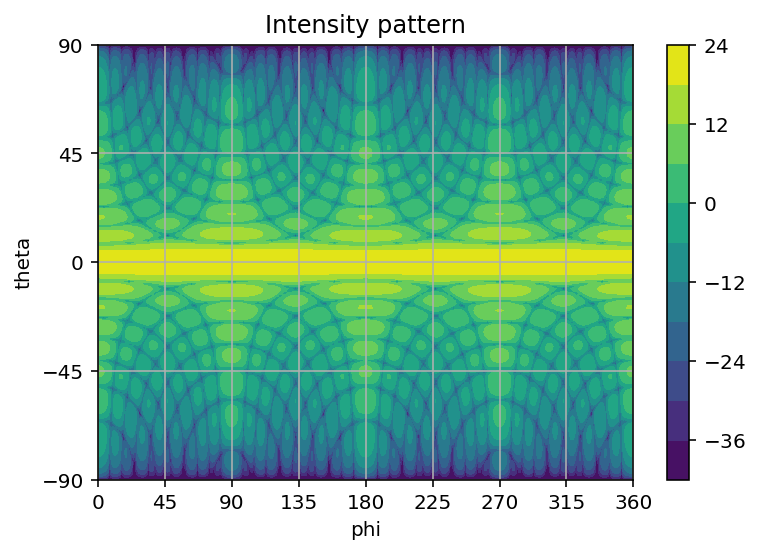

In [4]:
step = 1  # step size for various ranges
theta_min = -90
theta_max = 90
phi_min = 0
phi_max = 360

U_plt = 10*np.log10(np.abs(U)) # convert to dB magnitude for plotting
U_plt  = np.clip(U_plt,-40,np.inf) # set limits for plotted data

theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,U_plt,10)
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.title('Intensity pattern')
plt.show()

## principle plane cuts

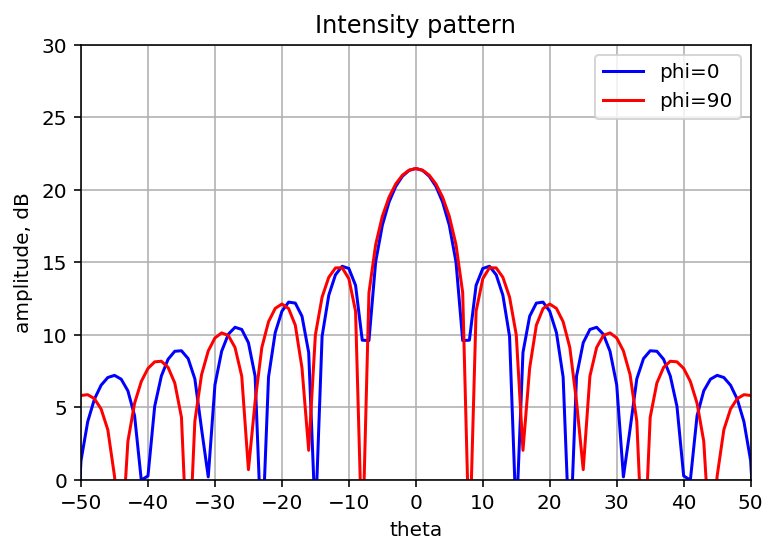

In [5]:
# plotting principle plane cuts
plt.plot(theta,10*np.log10(np.abs(U[:,0])),'b',label='phi=0')
plt.plot(theta,10*np.log10(np.abs(U[:,int(90/step)])),'r',label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(0,30)
# set plot limits
theta_min = -50
theta_max = 50
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=10))
plt.title('Intensity pattern')
plt.show()

## Polar plot

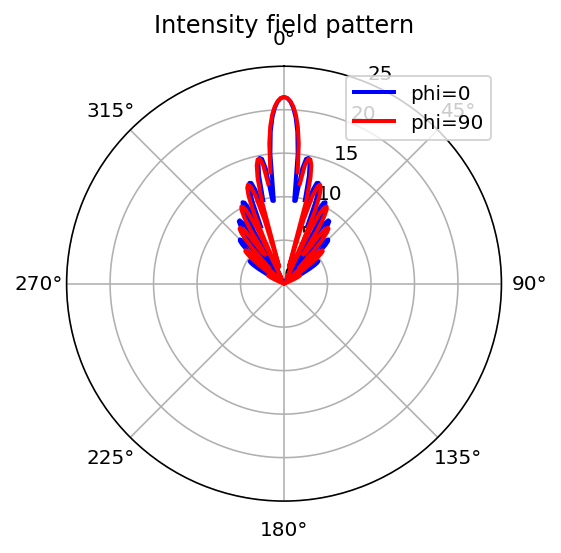

In [6]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = 0 #set plot grid
maxGrid = 26
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# convert deg to radians
theta_min = -90
theta_max = 90
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180

# Polar plot
ax.plot(theta,10*np.log10(np.abs(U[:,0])),'b',linewidth = 2,label='phi=0')
ax.plot(theta,10*np.log10(np.abs(U[:,int(90/step)])),'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
plt.title('Intensity field pattern')
plt.legend()
plt.show()

# Directivity
See page 101 of Antenna book.  

$D=\frac {4\pi}{\int _{0}^{{2\pi }}\int _{0}^{\pi} \frac {U(\theta,\phi)}{U_{max}} \sin(\theta )\,d\theta \,d\phi}$

In [7]:
U_max = np.abs(U).max()

# limits of integration
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

# multiply the antenna intensity pattern by sine(theta)
# integrate over every column
I = np.zeros(len(phi))
for i in range(len(phi)):
    I[i] = np.trapz((np.abs(U[:,i])/U_max)*np.sin(theta),theta)

# then an integral over the result
D = 4*np.pi/np.trapz(I,phi)

print('directivity = {:f} dB'.format(10*np.log10(D)))

directivity = 10.046537 dB


# Total radiated power
The total radiated power can be found by integrating over all directions:  

$P_{tot}=\int _{0}^{{2\pi }}\int _{0}^{\pi}U(\theta ,\phi )\sin(\theta )\,d\theta \,d\phi$

In [8]:
# limits of integration
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

# multiply the antenna intensity pattern by sine(theta)
# integrate over every column
I = np.zeros(len(phi))
for i in range(len(phi)):
    I[i] = np.trapz(np.abs(U[:,i])*np.sin(theta),theta)

# then an integral over the result
P_tot = np.trapz(I,phi)

print('radiated power = {:f} dB'.format(10*np.log10(P_tot)))

radiated power = 22.406842 dB


# Directivity
$D=4\pi \left({\frac {U_{{{\mathrm  {max}}}}}{P_{{{\mathrm  {rad}}}}}}\right)$

In [9]:
U_max = np.abs(U.max())
print('U_max = {:.1f} dB'.format(10*np.log10(U_max)))
D = 4*np.pi*(U_max/P_tot)
print('directivity = {:f} dB'.format(10*np.log10(D)))

U_max = 21.5 dB
directivity = 10.046537 dB


# Gain
Since the antenna is specified as being lossless the radiation efficiency is 1. The maximum gain is then equal to:  

$G=A_{eff}\,D$  

$G_{dBi}=10\log _{{10}}(G)$  

In [10]:
A_eff = 1  # antenna efficiency
G = A_eff*D
print('G = {:f}'.format(G))
print('G = {:f} dBi'.format(10*np.log10(G)))

G = 10.107732
G = 10.046537 dBi


# Beamwidth

# Side lobes

# Grating lobes